# Age Standardize Suicide rates

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import math

In [77]:
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning

# Filter out MatplotlibDeprecationWarnings
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)


In [78]:
df=pd.read_csv(r"F:\health\artifact\Age-standardized suicide rates.csv",delimiter=',')

In [79]:

df.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [80]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 549 rows and 6 columns


In [81]:
df1=df

In [82]:
df.shape

(549, 6)

In [83]:
df['Sex'].unique()

array([' Both sexes', ' Male', ' Female'], dtype=object)

# Distribution graphs (histogram/bar graph) of sampled columns:

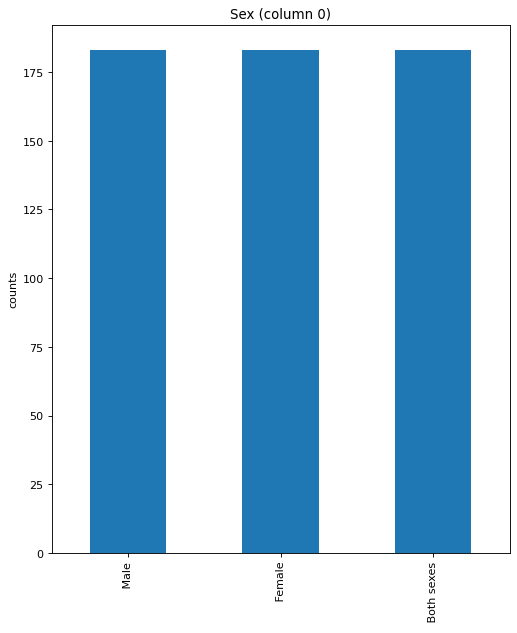

In [84]:


def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    
    
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)  
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
    
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotPerColumnDistribution(df1, 10, 5)


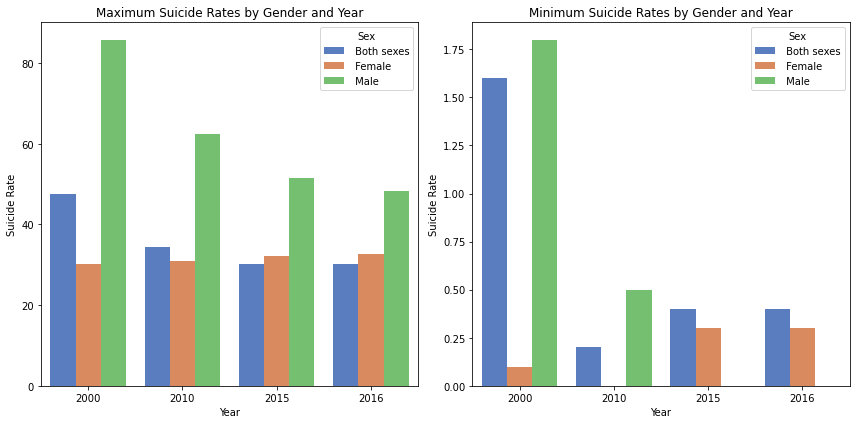

In [85]:
# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = pd.melt(df, id_vars=['Country', 'Sex'], var_name='Year', value_name='SuicideRate')

# Find maximum and minimum suicide rates year-wise for different sexes
max_rates = df_melted.groupby(['Year', 'Sex'])['SuicideRate'].max().reset_index()
min_rates = df_melted.groupby(['Year', 'Sex'])['SuicideRate'].min().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))

# Plot maximum rates
plt.subplot(1, 2, 1)
sns.barplot(x='Year', y='SuicideRate', hue='Sex', data=max_rates, palette='muted')
plt.title('Maximum Suicide Rates by Gender and Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Plot minimum rates
plt.subplot(1, 2, 2)
sns.barplot(x='Year', y='SuicideRate', hue='Sex', data=min_rates, palette='muted')
plt.title('Minimum Suicide Rates by Gender and Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

plt.tight_layout()
plt.show()

In [86]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna()  # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')

    # Display the correlation matrix as an image (heatmap)
    corrMat = ax.matshow(corr, cmap='coolwarm')

    # Add annotations to each cell
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            text = f"{corr.iloc[i, j]:.2f}"
            ax.text(j, i, text, ha='center', va='center', color='black')

    # Customize x and y-axis ticks
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()

    # Add a colorbar
    plt.colorbar(corrMat)

    # Add a title
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)

    # Show the plot
    plt.show()

In [87]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Scatter and density plot:

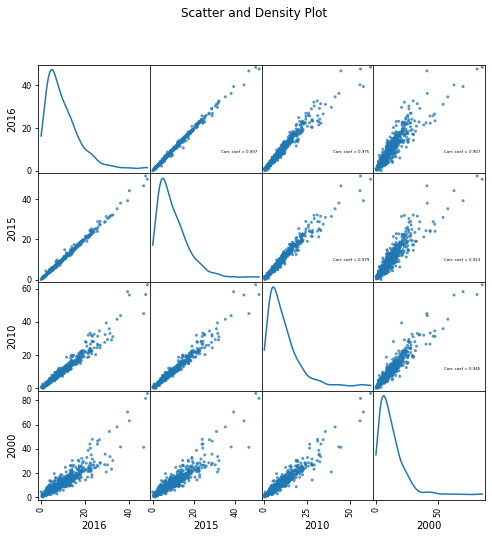

In [88]:
plotScatterMatrix(df1, 8, 4)

# Crude suicide rates

In [89]:
df=pd.read_csv(r"F:\health\artifact\Crude suicide rates.csv")

In [90]:
df.head()

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 10 columns):
Country      549 non-null object
Sex          549 non-null object
 80_above    549 non-null float64
 70to79      549 non-null float64
 60to69      549 non-null float64
 50to59      549 non-null float64
 40to49      549 non-null float64
 30to39      549 non-null float64
 20to29      549 non-null float64
 10to19      549 non-null float64
dtypes: float64(8), object(2)
memory usage: 43.0+ KB


In [92]:
df.describe()

,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,42.585428,25.936794,17.439162,14.743352,12.189435,10.895446,10.423315,4.075046
std,43.477900,24.795457,14.315504,12.790041,11.121364,10.148280,9.051273,3.393507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.600000,8.400000,6.600000,5.600000,4.800000,4.300000,4.300000,1.700000
50%,26.600000,17.100000,12.900000,11.200000,9.000000,8.000000,7.900000,3.100000
75%,55.500000,35.800000,24.000000,20.000000,16.400000,13.900000,13.500000,5.300000
max,285.000000,133.700000,78.500000,85.400000,86.500000,88.400000,57.400000,24.200000


In [93]:
df2=df

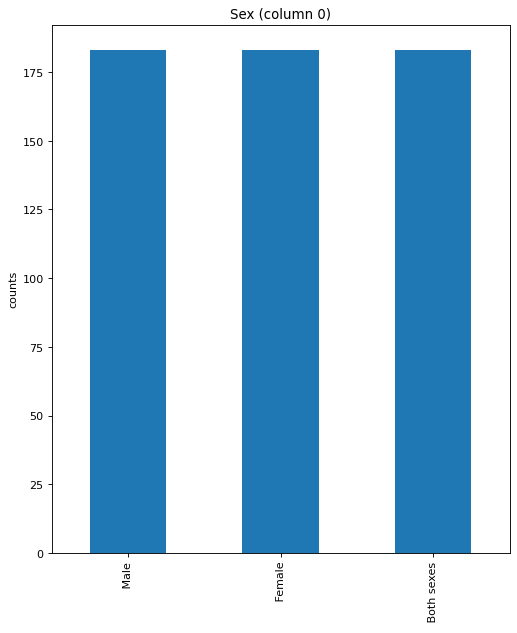

In [94]:
plotPerColumnDistribution(df2, 10, 5)

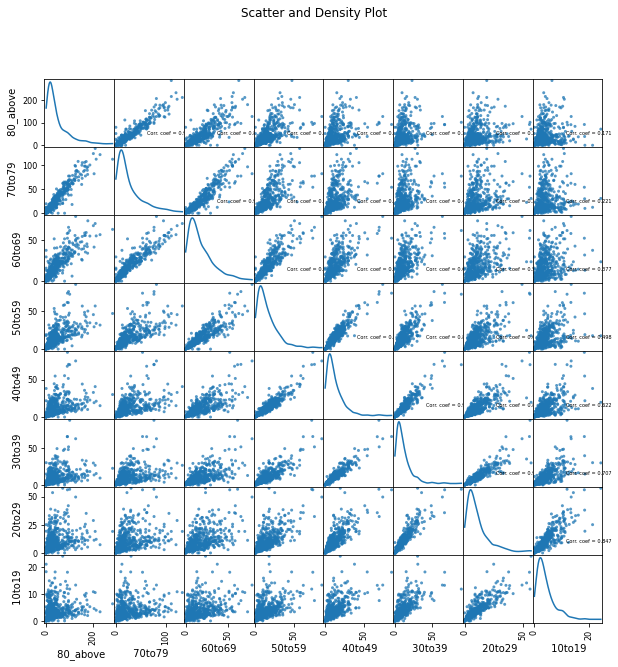

In [95]:
plotScatterMatrix(df2, 10, 5)

# Facilities

In [96]:
df=pd.read_csv(r"F:\health\artifact\Facilities.csv")

In [97]:
df.head()

,Country,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN


In [98]:
df.shape

(112, 7)

In [99]:
df.isnull().sum()

Country                    0
Year                       0
Mental _hospitals         22
health_units              10
outpatient _facilities    12
day _treatment            61
residential_facilities    67
dtype: int64

In [100]:
df.describe()

,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
count,112.0,90.000000,102.000000,100.000000,51.000000,45.000000
mean,2016.0,0.246133,0.319078,1.875130,1.134804,0.873311
std,0.0,0.910416,0.618220,3.227911,2.725713,1.609117
min,2016.0,0.000000,0.006000,0.006000,0.002000,0.006000
25%,2016.0,0.018250,0.035750,0.123500,0.022500,0.033000
50%,2016.0,0.036500,0.093500,0.573000,0.125000,0.152000
75%,2016.0,0.158750,0.379000,2.236000,0.760500,0.479000
max,2016.0,8.314000,4.542000,19.751000,17.176000,6.178000


In [101]:
df4=df

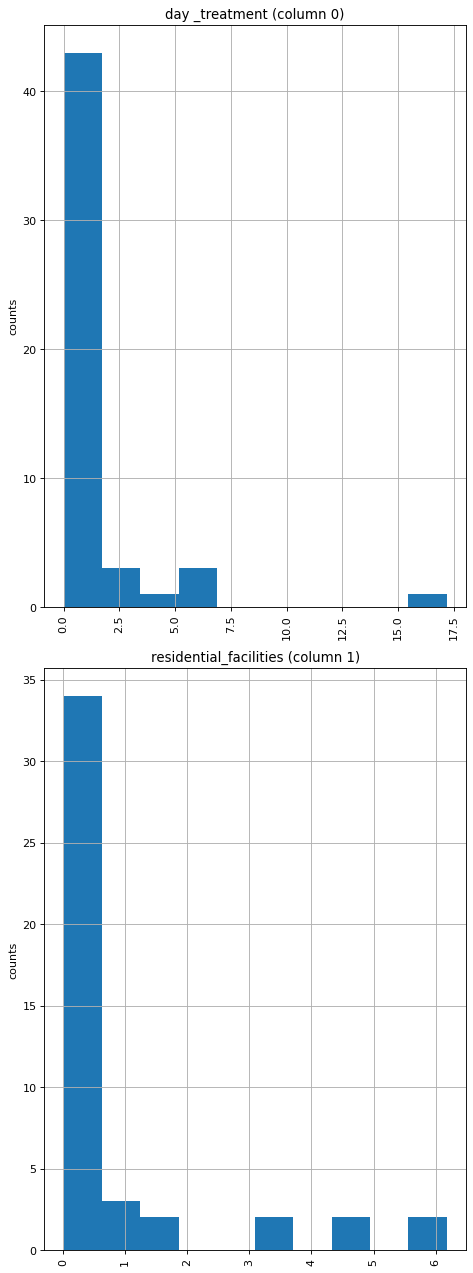

In [102]:
plotPerColumnDistribution(df4,3, 1)

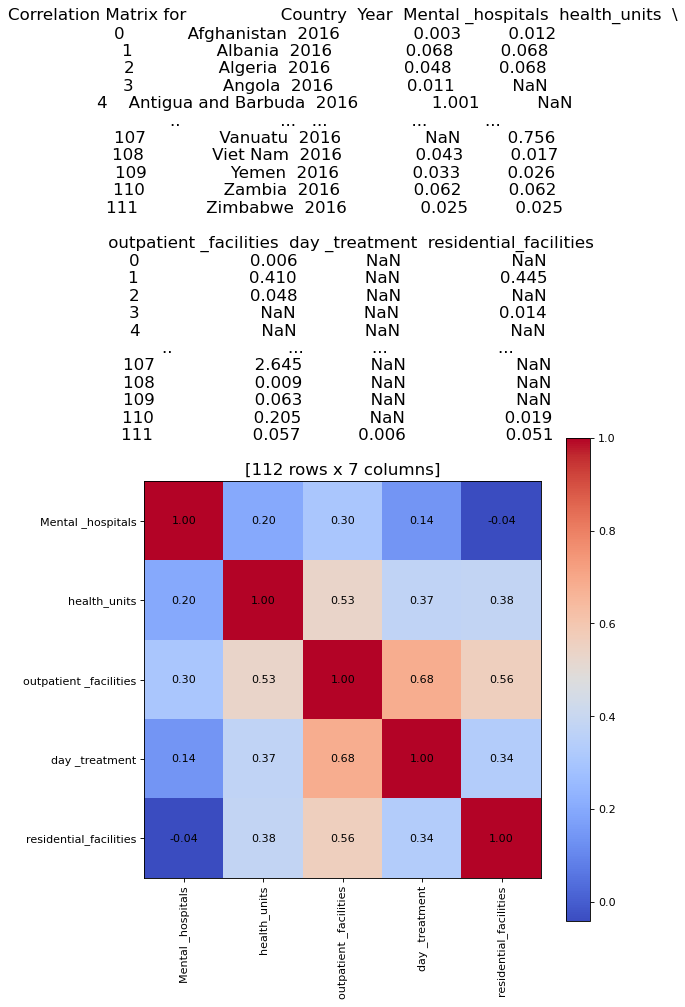

In [103]:
plotCorrelationMatrix(df4, 8)

In [104]:
facilities=df4

When you check day_treatment and residential_facilities - almost 50% of the values is null here. I would not like to proceed with these coulumns and drop them. For other columns, I would be replacing them with the median values for better representation. I did not pick to replace with 0 here, as that may skew the distribution.

In [105]:
#dropping columns
facilities = facilities.drop(columns=["day _treatment","residential_facilities"])

#filling NaN in other columns with Median
facilities["Mental _hospitals"].fillna(facilities["Mental _hospitals"].median(), inplace = True)
facilities["health_units"].fillna(facilities["health_units"].median(), inplace = True)
facilities["outpatient _facilities"].fillna(facilities["outpatient _facilities"].median(), inplace = True)

#Let's check again for null values
print(facilities.isnull().sum())

#Let's look at head again
facilities.head()

Country                   0
Year                      0
Mental _hospitals         0
health_units              0
outpatient _facilities    0
dtype: int64


,Country,Year,Mental _hospitals,health_units,outpatient _facilities
0,Afghanistan,2016,0.003,0.0120,0.006
1,Albania,2016,0.068,0.0680,0.410
2,Algeria,2016,0.048,0.0680,0.048
3,Angola,2016,0.011,0.0935,0.573
4,Antigua and Barbuda,2016,1.001,0.0935,0.573


In [106]:
#Removing year as it of no value further.
facilities = facilities.drop(columns=["Year"])

<AxesSubplot:xlabel='Mental _hospitals'>

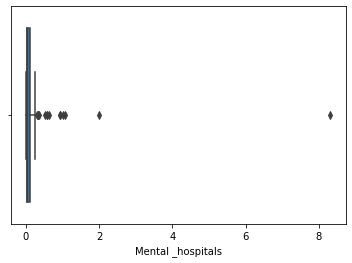

In [107]:
sns.boxplot(x=facilities["Mental _hospitals"])

In [108]:
median = facilities['Mental _hospitals'].median()
facilities["Mental _hospitals"] = np.where(facilities["Mental _hospitals"] >1, median,facilities['Mental _hospitals'])

Now that we are done with the null values, let's look at outliers. It's good to look at outliers and remove them if they are misrepresenting the true sense of data. We'll be using box plot.

<AxesSubplot:xlabel='Mental _hospitals'>

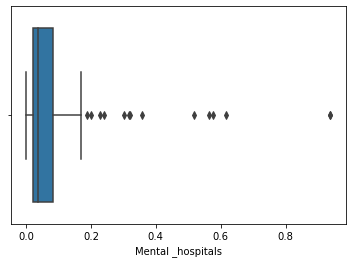

In [109]:
sns.boxplot(x=facilities["Mental _hospitals"])

<AxesSubplot:xlabel='health_units'>

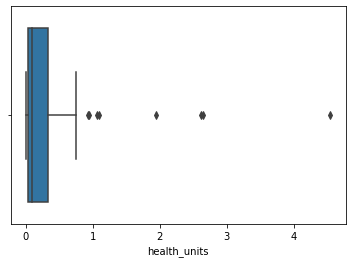

In [110]:
sns.boxplot(x=facilities["health_units"])

In [111]:
median = facilities['health_units'].median()
facilities["health_units"] = np.where(facilities["health_units"] >1, median,facilities['health_units'])

<AxesSubplot:xlabel='health_units'>

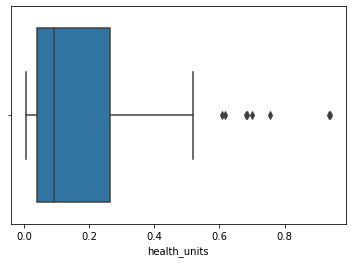

In [112]:
sns.boxplot(x=facilities["health_units"])

Note: We remove outliers because we think they may be bad data recieved during data collection, human errors, etc. In this case, it may be so that the outliers may not be bad data and should not be replaced by central tendencies. If you think so, you may skip the above steps.

Visualizing Facilities¶
Now that we are done with data cleaning. Let's plot.

We'll be doing 3 simple plots here -

1. Histogram

2. Heat maps

3. Scatterplot

<AxesSubplot:xlabel='outpatient _facilities'>

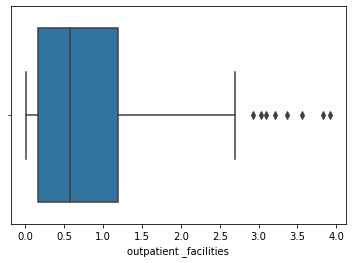

In [75]:
sns.boxplot(x=facilities["outpatient _facilities"])

In [41]:
#Removing above 5 for outpatient facilities

<AxesSubplot:xlabel='outpatient _facilities'>

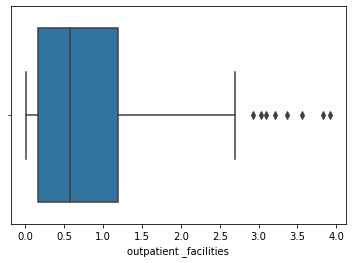

In [43]:
sns.boxplot(x=facilities["outpatient _facilities"])

<AxesSubplot:>

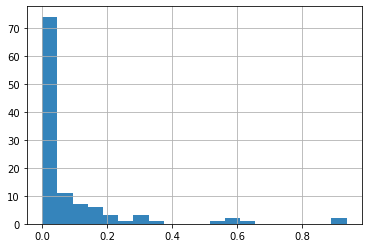

In [44]:
facilities["Mental _hospitals"].hist(bins=20, alpha=0.9)

,Mental _hospitals,health_units,outpatient _facilities
Mental _hospitals,1.000000,0.386775,0.205639
health_units,0.386775,1.000000,0.334012
outpatient _facilities,0.205639,0.334012,1.000000


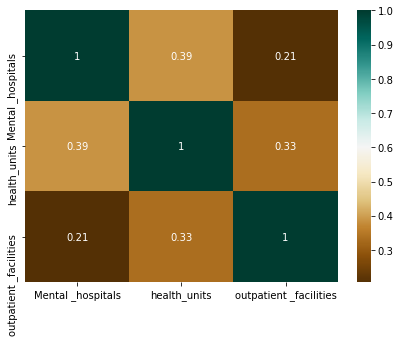

In [45]:
# Finding the relations between different columns using Heat Map
plt.figure(figsize=(7,5))
corelations= facilities.corr()


sns.heatmap(corelations,cmap="BrBG",annot=True)
corelations 


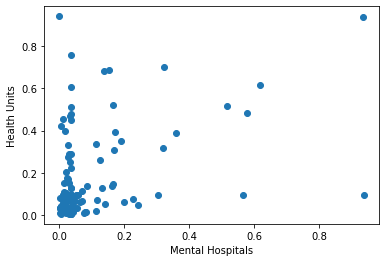

In [46]:
#Scatter plot between Health Units and Mental Hospitals
plt.scatter(facilities["Mental _hospitals"],facilities["health_units"])
plt.xlabel('Mental Hospitals')
plt.ylabel('Health Units')
plt.show()

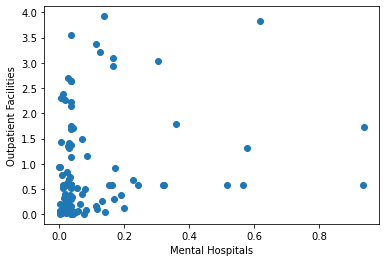

In [47]:
# Scatter plot between Mental_hospital and outpatient_facilities
plt.scatter(facilities["Mental _hospitals"],facilities["outpatient _facilities"])
plt.xlabel('Mental Hospitals')
plt.ylabel('Outpatient Facilities')
plt.show()